# EJERCICIO 4


Se pide para las siguientes
señales:

1.   Simular la señal
2.   Valor indicado por un
multímetro que responde a
valor medio de módulo.
3.   Simular la indicación
4.   Valor indicado por un
instrumento que responde a
valor pico+
5.   Simular y calcular el valor
RMS de la SEÑAL
6.   Simular y calcular el valor
medio algebraico

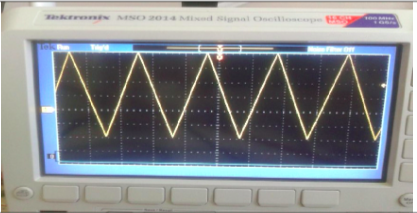
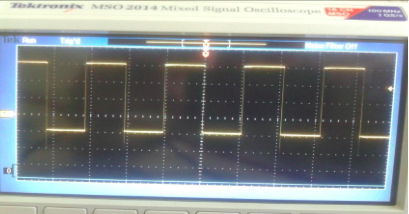

In [102]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt


#1.   Simular la señal -> Triangular



Parametros obtenidos de la lectura de la pantalla del osciloscopio

In [103]:
AMPLITUD_TRIANGULAR = 0.6
OFFSET_TRIANGULAR = 0.2
PERIODO_TRIANGULAR = 80

---

In [104]:
FRECUENCIA_TRIANGULAR = 1/PERIODO_TRIANGULAR
t = np.linspace(0, 2*PERIODO_TRIANGULAR, 500)



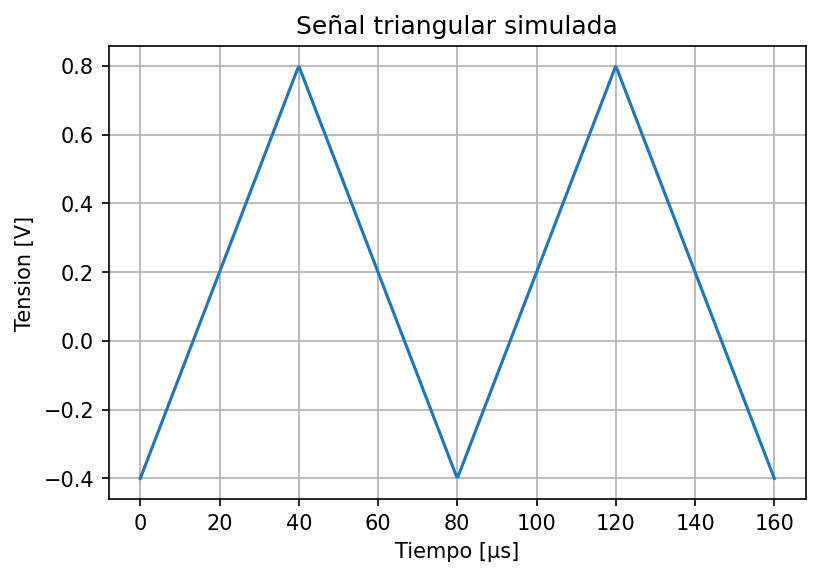

In [105]:
triang_sign = AMPLITUD_TRIANGULAR*signal.sawtooth(2*np.pi * FRECUENCIA_TRIANGULAR * t,0.5) + OFFSET_TRIANGULAR

triang_sign_2=triang_sign_1 = triang_sign  #uso una copia para resolver el punto 3

plt.figure(dpi = 150)
plt.xlabel('Tiempo [μs]')
plt.ylabel('Tension [V]')
plt.title('Señal triangular simulada')
plt.grid(True)
plt.plot(t, triang_sign)

# 1.   Simular la señal -> Cuadrada




Parametros obtenidos de la lectura de la pantalla del osciloscopio

In [106]:
AMPLITUD_SQ = 0.4
OFFSET_SQ = 0.2
PERIODO_SQ = 80
DUTY_CYCLE = 0.5

---

In [107]:
FRECUENCIA_SQ = 1 / PERIODO_SQ

t = np.linspace(0, 2*PERIODO_SQ, 500)

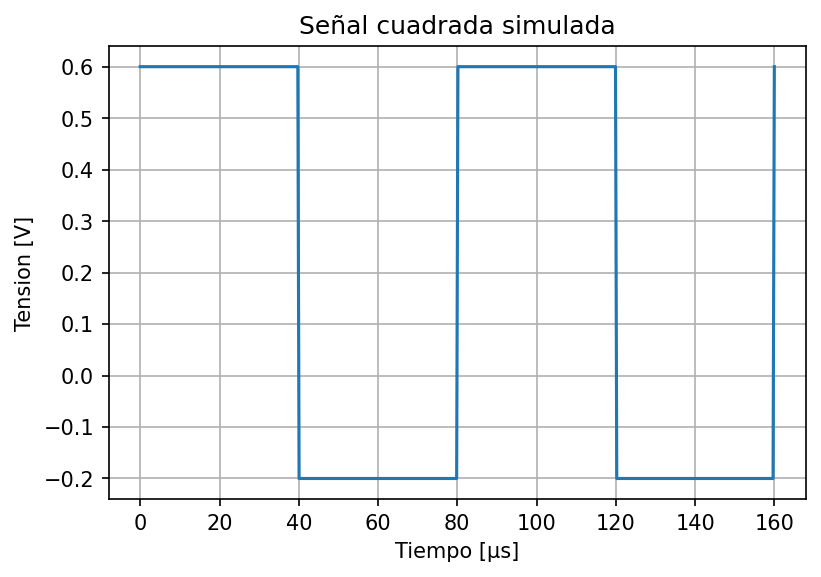

In [108]:
sq_signal = AMPLITUD_SQ * signal.square(2*np.pi*FRECUENCIA_SQ*t, DUTY_CYCLE) + OFFSET_SQ

sq_signal_2=sq_signal_1=sq_signal

plt.figure(dpi = 150)
plt.xlabel('Tiempo [μs]')
plt.ylabel('Tension [V]')
plt.title('Señal cuadrada simulada')
plt.grid(True)
plt.plot(t, sq_signal)

# 2. Valor indicado por un multímetro que responde a valor medio de módulo.


In [109]:
#Calculo el valor medio de la señal. ES EL EFECTO DEL CAPACITOR
def dcValue(signal):
  return signal.mean()
#Capacitor de acople
def acCoupling(signal):
  return signal - dcValue(signal)
#Efecto retificador de la señal de entrada
def rectifier (signal):
  return np.abs(signal)

In [110]:
def rmsMultimetroMe(signal):
  kme = np.pi/np.sqrt(2)/2
  signal = acCoupling(signal)
  signal = rectifier(signal)
  signal = dcValue(signal)
  signal = signal*kme
  return signal

## Señal -> Triangular

In [111]:
triang_sign =  rmsMultimetroMe (triang_sign)

In [112]:
print('Valor multimetro que responde a valor medio de modulo',triang_sign)

Valor multimetro que responde a valor medio de modulo 0.33388398833855454


## Señal -> Cuadrada

In [113]:
sq_signal =  rmsMultimetroMe (sq_signal)

In [114]:
print('Valor multimetro que responde a valor medio de modulo ',sq_signal)

Valor multimetro que responde a valor medio de modulo  0.4442811852031357


#3. Simular la indicación

Un tester que responde a valor medio de modulo si le inyecto una señal triangular el valor indicado sera:


De la imagen del osciloscopio obtuvimos: 


1.  T1:  56 uS (Tiempo pico positivo señal)
2.  T2:  24 uS (Tiempo pico negativo señal)
3.  Vp+: 0.8 V
4.  Vp-: 0.4 V


In [115]:

Sme=FRECUENCIA_TRIANGULAR* ( (56*0.8)/2 + (24*0.4)/2)
si_triang = Sme*(np.pi/np.sqrt(2)/2)
print('El valor indicado por un tester que responde al valor medio de modulo es: ', si_triang)

El valor indicado por un tester que responde al valor medio de modulo es:  0.3776450497434612


Un tester que responde a valor medio de modulo si le inyecto una señal cuadrada el valor indicado sera:

In [116]:
spp=AMPLITUD_SQ*2
si_cuadrada = (spp)*(1-DUTY_CYCLE)*DUTY_CYCLE*(np.pi/np.sqrt(2))
print('El valor indicado por un tester que responde al valor medio de modulo es: ', si_cuadrada)

El valor indicado por un tester que responde al valor medio de modulo es:  0.4442882938158366


#4. Valor indicado por un instrumento que responde a valor pico+

In [117]:
def rmsMultimetroPico(signal):
  kp = 1 / np.sqrt(2)
  signal = acCoupling(signal)
  signal = rectifier(signal)
  signal = signal.max()*kp
  return signal

## Señal -> Triangular

In [118]:
valor_pico_triang = rmsMultimetroPico(triang_sign_1)

print('Valor multimetro que responde a valor pico ',sq_signal)

Valor multimetro que responde a valor pico  0.4442811852031357


## Señal -> Cuadrada

In [119]:
valor_pico_triang = rmsMultimetroPico(sq_signal_1)

print('Valor multimetro que responde a valor pico ',valor_pico_triang)

Valor multimetro que responde a valor pico  0.28397408332451746


#5. Simular y calcular el valor RMS de la SEÑAL

## Calculo señal RMS

In [120]:
rmsAlgoritmo = np.sqrt((acCoupling(triang_sign_2)**2+dcValue(triang_sign_2)**2).mean()) #Valor cuadratido medio
print('Valor RMS señal triangular ',rmsAlgoritmo)

rmsAlgoritmo = np.sqrt((acCoupling(sq_signal_2)**2+dcValue(sq_signal_2)**2).mean()) #Valor cuadratido medio
print('Valor RMS señal cuadrada   ',rmsAlgoritmo)

Valor RMS señal triangular  0.4
Valor RMS señal cuadrada    0.4479285657334214


## Simulacion señal RMS

### Señal -> Triangular

In [121]:
kme = np.pi/np.sqrt(2)/2
Factor_correccion_triang =kme*2/np.sqrt(3)
s_triang_corregida=si_triang*Factor_correccion_sq
print('Señal TRIANGULAR corregida: ',s_triang_corregida)



Señal TRIANGULAR corregida:  0.3400000000000001


### Señal -> Cuadrada

In [122]:
Factor_correccion_sq = np.sqrt(2)/(np.pi*np.sqrt(DUTY_CYCLE*(1-DUTY_CYCLE)))
s_cuadrada_corregida=si_cuadrada*Factor_correccion_sq
print('Señal CUADRADA corregida: ',s_cuadrada_corregida)

Señal CUADRADA corregida:  0.4


#6. Simular y calcular el valor medio algebraico


 ## Calculo valor medio algebraico

In [123]:
v_medio_triang=FRECUENCIA_SQ*(triang_sign_1.max()+triang_sign_1.min())/2
print('Valor medio algebraico calculado señal triangular ', v_medio_triang)

v_medio_sq=FRECUENCIA_SQ*sq_signal_1.mean()
print('Valor medio algebraico calculado cuadrada ', v_medio_sq)

Valor medio algebraico calculado señal triangular  0.002484969939879762
Valor medio algebraico calculado cuadrada  0.0025199999999999992
